<h1><center>
    ECE 438 - Laboratory 8<br/>
    Number Representation and Waveform Quantization<br/>
    <small>Last Updated on May 5, 2022</small><br/>
    <br/>
    Date: March 23, 2023<br/>
    Section: Thursday 11:30am<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin|CJD |1.5 Hr |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of uniform quantizer (45 pts)**: *Image: original and quantized images, comparison, questions. Audio: Python figures, questions*||||
|**Understanding of error analysis (35 pts)**: *Error histograms, correlation, PSNR, rate-distortion curve, questions*||||
|**Understanding of max quantizer (20 pts)**: *Histograms, PSNR, comparison with uniform quantizer*||||

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import xcorr, lloyds

In [ ]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 3.3: Image Quantization</left></h3>

**1. Load the image and display it using the following sequence of commands.**

```python
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()
```

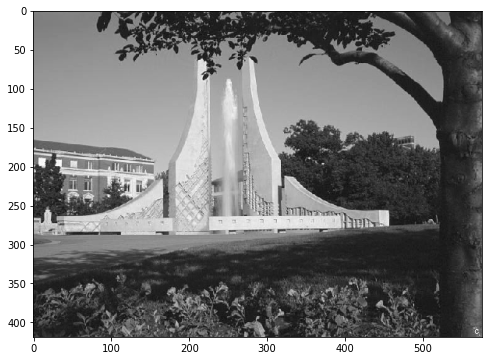

In [ ]:
# insert your code here
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()


**2. Print the data type of this image, then convert the image matrix to type `float`, and print the data type of this image again.**

* Use `image.dtype` to get the data type of `image`.

In [ ]:
# insert your code here
print(image.dtype)

image = image.astype(float)

print(image.dtype)


uint8
float64


**3. Complete the function below which will uniformly quantize an input array ```X``` (either a vector or a matrix) to an ```numBits```-bit array.**

In [ ]:
def Uquant(X, numBits):
    """
    Parameters
    ---
    X: the input array to be quantized
    numBits: the number of bits. The number of quantization levels will be 2^numBits.
    
    Returns
    ---
    Y: the quantized array
    """
    delta = ( np.amax(X) - np.amin(X) ) / ( 2 ** numBits - 1)
    Y = np.around( ( X - np.amin(X) ) / delta ) * delta + np.amin(X)
    return Y

**4. Use this function to quantize the fountain image to $7$, $6$, $5$, $4$, $3$, $2$, $1$ b/pel, and display and observe the output images. Don't forget the titles of the images.**

* To display a grayscale image `image`, use the following commands:
```python
plt.imshow(image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()
```

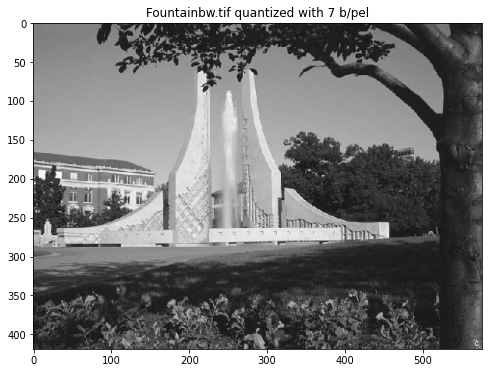

In [ ]:
# insert your code here
plt.imshow(Uquant(image, 7), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 7 b/pel")
plt.show()

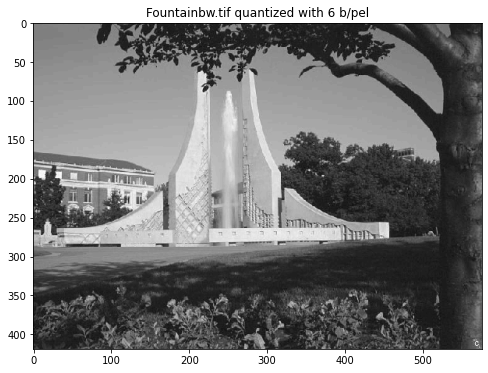

In [ ]:
plt.imshow(Uquant(image, 6), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 6 b/pel")
plt.show()

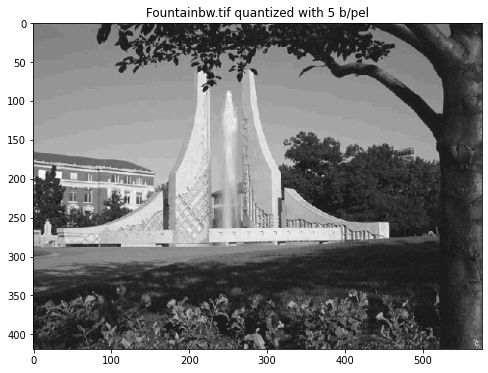

In [ ]:
plt.imshow(Uquant(image, 5), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 5 b/pel")
plt.show()

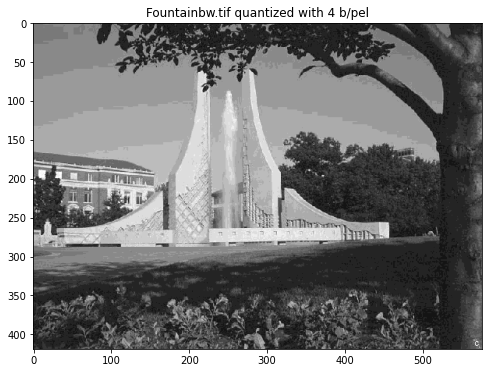

In [ ]:
plt.imshow(Uquant(image, 4), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 4 b/pel")
plt.show()

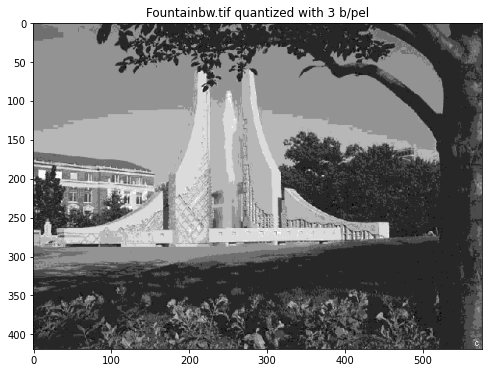

In [ ]:
plt.imshow(Uquant(image, 3), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 3 b/pel")
plt.show()

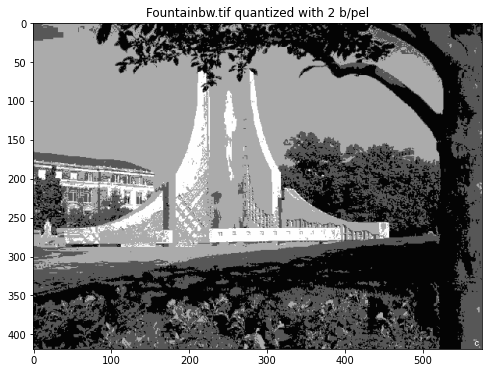

In [ ]:
plt.imshow(Uquant(image, 2), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 2 b/pel")
plt.show()

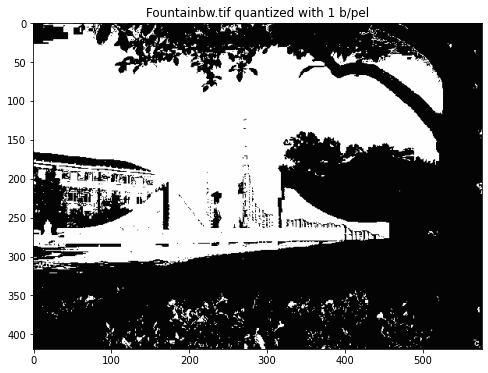

In [ ]:
plt.imshow(Uquant(image, 1), cmap='gray', vmin=0, vmax=255)
plt.title("Fountainbw.tif quantized with 1 b/pel")
plt.show()

**5. Describe the artifacts (errors) that appear in the image as the number of bits is lowered.**

As the amount of bits was lowered, the image quality starts to deteriorate. With the original sample, there are layers, clear details (edges), and different shades. At 1 bit, the image has no layers and is only in black and white.

**6. Note the number of b/pel at which the image quality noticeably deteriorates.**

Image quality really starts to change from 4 b/pel to 2 b/pel. 

**7. Compare each of four quantized images ($7$, $4$, $2$ and $1$ b/per) to the original.**

At 7 b/pel, there is almost no noticeable change. When set to 4 b/pel, there are less shades and details, and at 2 bits/pixel the image’s quality alters the most, losing even more shades and details. At 1 b/pel, the image is only black and white

<h3 style="color:red;"><left>Exercise 3.4: Audio Quantization</left></h3>

**1. Use your function `Uquant()` to quantize each of these signals: ```speech.au``` and ```music.au``` to 7, 4, 2 and 1 bits/sample. Listen to the original and quantized signals.**

* To read an audio file:
```python
speech, fs = sf.read("speech.au")  # speech is the signal vector, and fs is the sampling frequency
```
* To play a signal
```python
ipd.Audio(speech, rate=fs)
```

In [ ]:
# insert your code here
speech, fs = sf.read("speech.au")
ipd.Audio(speech, rate=fs)

In [ ]:
qs7 = Uquant(speech, 7)
ipd.Audio(qs7, rate=fs)

In [ ]:
qs4 = Uquant(speech, 4)
ipd.Audio(qs4, rate=fs)

In [ ]:
qs2 = Uquant(speech, 2)
ipd.Audio(qs2, rate=fs)

In [ ]:
qs1 = Uquant(speech, 1)
ipd.Audio(qs1, rate=fs)

In [ ]:
# insert your code here
music, fs = sf.read("music.au")
ipd.Audio(music, rate=fs)

In [ ]:
qm7 = Uquant(music, 7)
ipd.Audio(qm7, rate=fs)

In [ ]:
qm4 = Uquant(music, 4)
ipd.Audio(qm4, rate=fs)

In [ ]:
qm2 = Uquant(music, 2)
ipd.Audio(qm2, rate=fs)

In [ ]:
qm1 = Uquant(music, 1)
ipd.Audio(qm1, rate=fs)

**2. For each signal, describe the change in quality as the number of b/sample is reduced.**

Similar to the exercise 3.3, when the amount of bits is lowered, the quality of the audio signal starts to deteriorate. At 7 b/pel, the quality is sounds the same as the original audio file. At 4 b/pel, the quality remains clear but some distortion can start to be heard. At 2 b/pel, the quality is significantly reduced and becomes very hard to hear the original audio file. At 1 b/pel, the signal becomes impossible to comprehend due to extreme amount of distortion.

**3. For each signal, is there a point at which the signal quality deteriorates drastically? At what point (if any) does it become incomprehensible?**

The audio quality deteriorates drastically between 4 b/pel and 2 b/pel. At 1 b/pel, the audio becomes incomprehensible (could be subjective).

**4. Which signal’s quality deteriorates faster as the number of levels decreases?**

Music.au quality deteriorates faster compared to speech.au

**5. Do you think 4 b/sample is acceptable for telephone systems? What about 2 b/sample?**

4 b/pel could be considered acceptable since you can still make out the original audio and 2 b/pel could be considered acceptable in emergency situations as a last resort. However, in 2023, the audio quality would be way below industry standards, and, in many cases, it would not be considered acceptable by the companies/general public.

**6. Plot the four quantized `speech` signals over the index range $[7200:7400)$. Generate a similar figure for the `music` signal, using the same indices.**

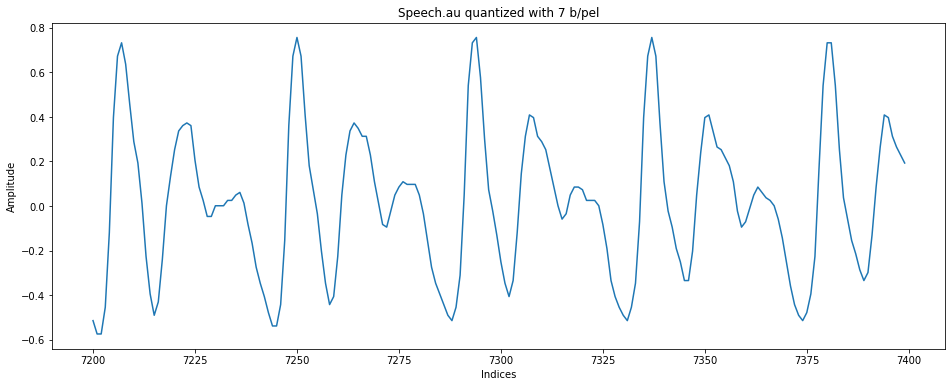

In [ ]:
# insert your code here
plt.title("Speech.au quantized with 7 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qs7[7200:7400])


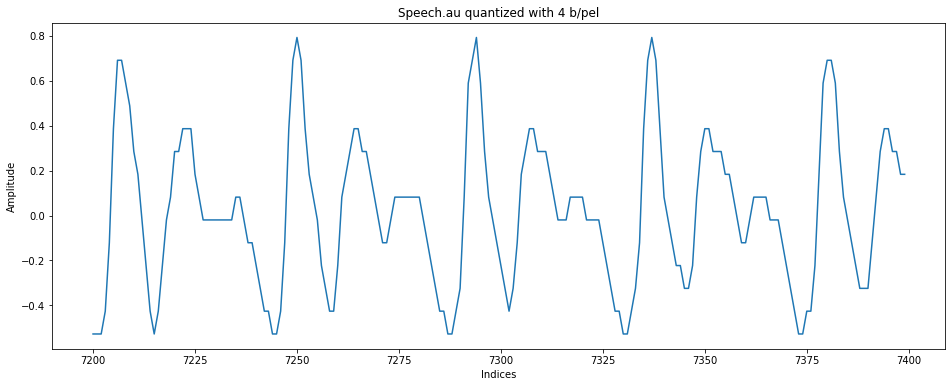

In [ ]:
plt.title("Speech.au quantized with 4 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qs4[7200:7400])

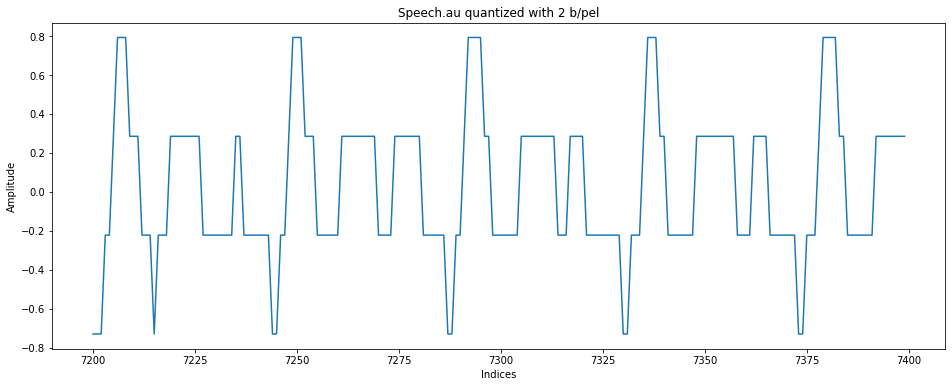

In [ ]:
plt.title("Speech.au quantized with 2 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qs2[7200:7400])

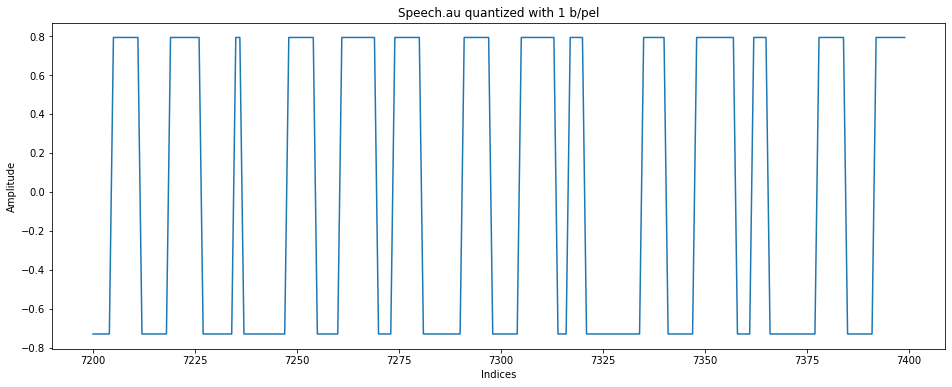

In [ ]:
plt.title("Speech.au quantized with 1 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qs1[7200:7400])

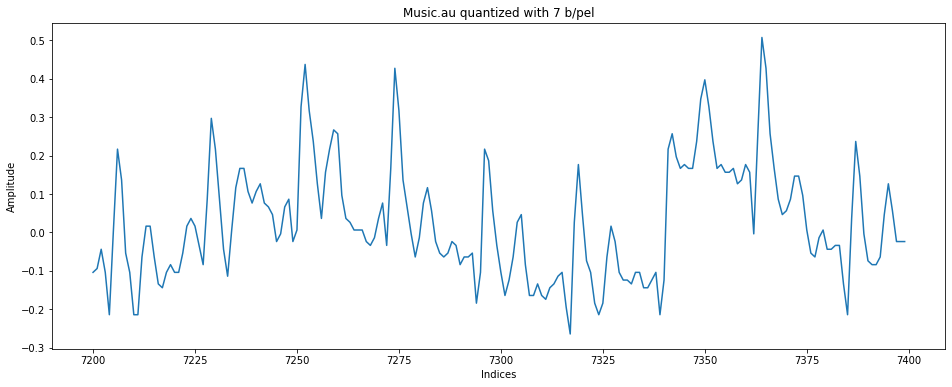

In [ ]:
plt.title("Music.au quantized with 7 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qm7[7200:7400])

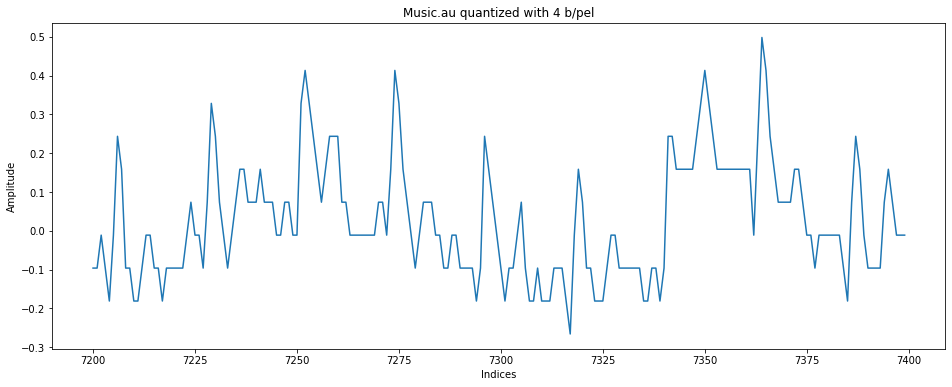

In [ ]:
plt.title("Music.au quantized with 4 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qm4[7200:7400])

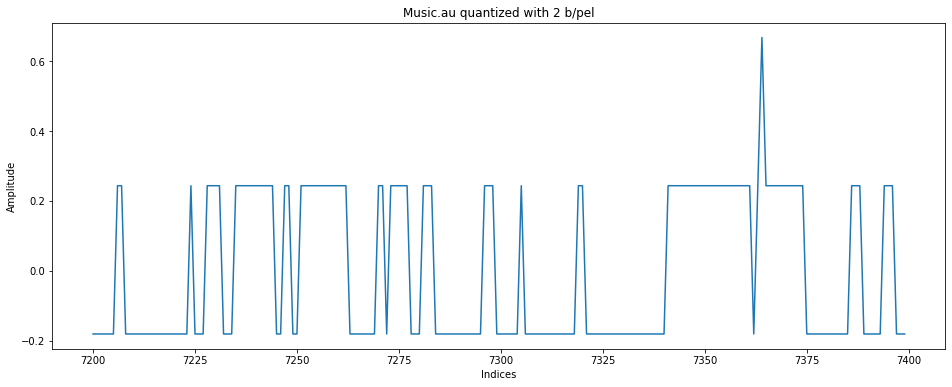

In [ ]:
plt.title("Music.au quantized with 2 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qm2[7200:7400])

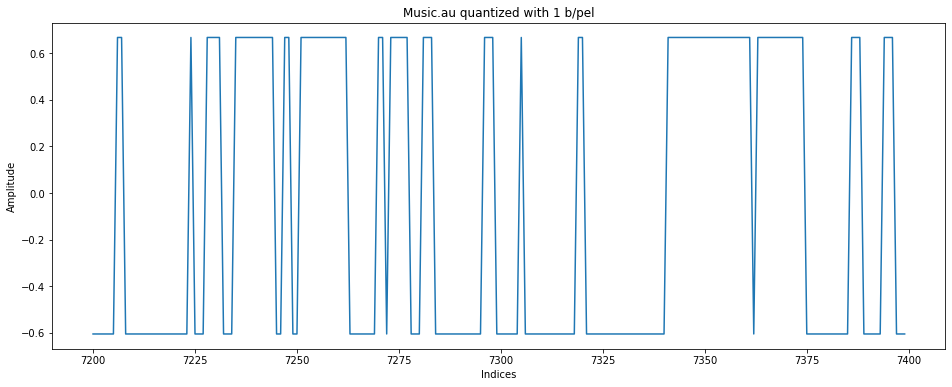

In [ ]:
plt.title("Music.au quantized with 1 b/pel")
plt.ylabel("Amplitude")
plt.xlabel("Indices")
plt.plot(np.arange(7200,7400,1), qm1[7200:7400])

<h3 style="color:red;"><left>Exercise 3.5. Error Analysis</left></h3>

**1. Compute the error signal for the quantized speech for $7$, $4$, $2$ and $1$ b/sample.**

In [ ]:
# insert your code here
e7 = qs7 - speech 
e4 = qs4 - speech
e2 = qs2 - speech
e1 = qs1 - speech

**2. Use the command [```plt.hist(E, bins=20)```](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) to generate 20-bin histograms for each of the four error signals.**

(array([ 998.,  921., 1353.,  895.,  991., 2122.,  894.,  950., 1178.,
         748., 1225., 1115., 2013., 1011.,  804., 1486.,  673.,  887.,
        1371., 2124.]),
 array([-5.94588152e-03, -5.35782942e-03, -4.76977731e-03, -4.18172521e-03,
        -3.59367311e-03, -3.00562100e-03, -2.41756890e-03, -1.82951679e-03,
        -1.24146469e-03, -6.53412586e-04, -6.53604823e-05,  5.22691622e-04,
         1.11074373e-03,  1.69879583e-03,  2.28684793e-03,  2.87490004e-03,
         3.46295214e-03,  4.05100424e-03,  4.63905635e-03,  5.22710845e-03,
         5.81516056e-03]),
 <BarContainer object of 20 artists>)

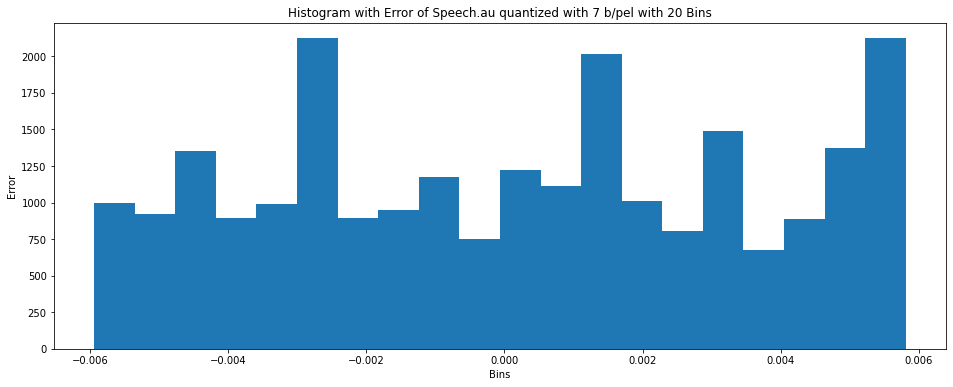

In [ ]:
# insert your code here
plt.title("Histogram with Error of Speech.au quantized with 7 b/pel with 20 Bins")
plt.ylabel("Error")
plt.xlabel("Bins")
plt.hist(e7, bins=20)

(array([1435., 1957., 2426., 2061., 2159., 1507., 1312.,  905.,  913.,
         697.,  847.,  657.,  773.,  898.,  637.,  760.,  983.,  706.,
         917., 1209.]),
 array([-0.05068359, -0.04561523, -0.04054687, -0.03547852, -0.03041016,
        -0.0253418 , -0.02027344, -0.01520508, -0.01013672, -0.00506836,
         0.        ,  0.00506836,  0.01013672,  0.01520508,  0.02027344,
         0.0253418 ,  0.03041016,  0.03547852,  0.04054687,  0.04561523,
         0.05068359]),
 <BarContainer object of 20 artists>)

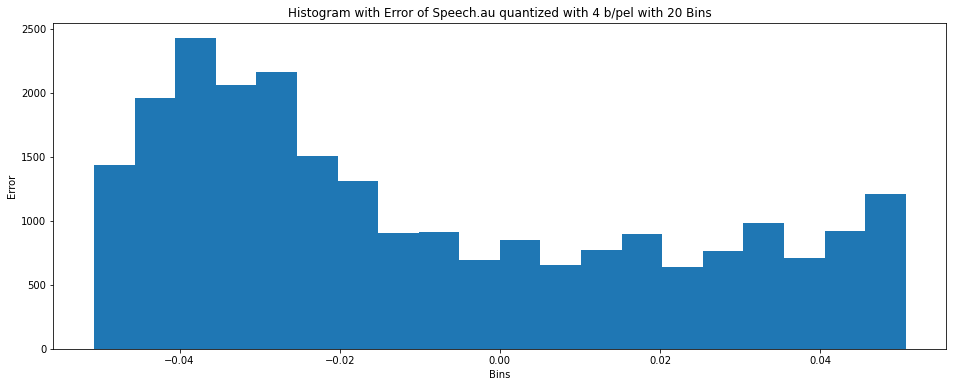

In [ ]:
plt.title("Histogram with Error of Speech.au quantized with 4 b/pel with 20 Bins")
plt.ylabel("Error")
plt.xlabel("Bins")
plt.hist(e4, bins=20)

(array([7943., 2886., 1162.,  878.,  766.,  501.,  486.,  440.,  433.,
         478.,  361.,  446.,  454.,  447.,  465.,  487.,  720.,  911.,
        1171., 2324.]),
 array([-2.52766927e-01, -2.27478027e-01, -2.02189128e-01, -1.76900228e-01,
        -1.51611328e-01, -1.26322428e-01, -1.01033529e-01, -7.57446289e-02,
        -5.04557292e-02, -2.51668294e-02,  1.22070312e-04,  2.54109701e-02,
         5.06998698e-02,  7.59887695e-02,  1.01277669e-01,  1.26566569e-01,
         1.51855469e-01,  1.77144368e-01,  2.02433268e-01,  2.27722168e-01,
         2.53011068e-01]),
 <BarContainer object of 20 artists>)

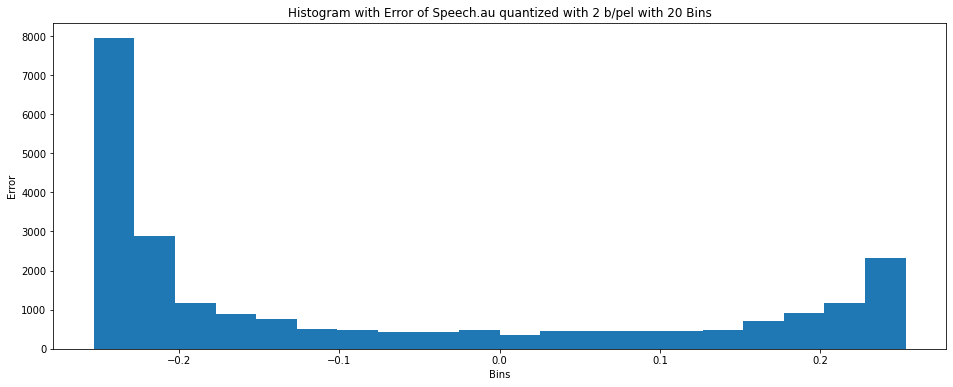

In [ ]:
plt.title("Histogram with Error of Speech.au quantized with 2 b/pel with 20 Bins")
plt.ylabel("Error")
plt.xlabel("Bins")
plt.hist(e2, bins=20)

(array([1.1985e+04, 1.9070e+03, 1.0420e+03, 7.5200e+02, 3.3700e+02,
        1.3700e+02, 6.9000e+01, 3.3000e+01, 4.0000e+00, 1.1000e+01,
        2.6000e+01, 1.8000e+01, 3.0000e+01, 4.4000e+01, 1.0500e+02,
        2.2600e+02, 4.7400e+02, 8.4100e+02, 1.4540e+03, 4.2640e+03]),
 array([-7.60498047e-01, -6.84436035e-01, -6.08374023e-01, -5.32312012e-01,
        -4.56250000e-01, -3.80187988e-01, -3.04125977e-01, -2.28063965e-01,
        -1.52001953e-01, -7.59399414e-02,  1.22070312e-04,  7.61840820e-02,
         1.52246094e-01,  2.28308105e-01,  3.04370117e-01,  3.80432129e-01,
         4.56494141e-01,  5.32556152e-01,  6.08618164e-01,  6.84680176e-01,
         7.60742188e-01]),
 <BarContainer object of 20 artists>)

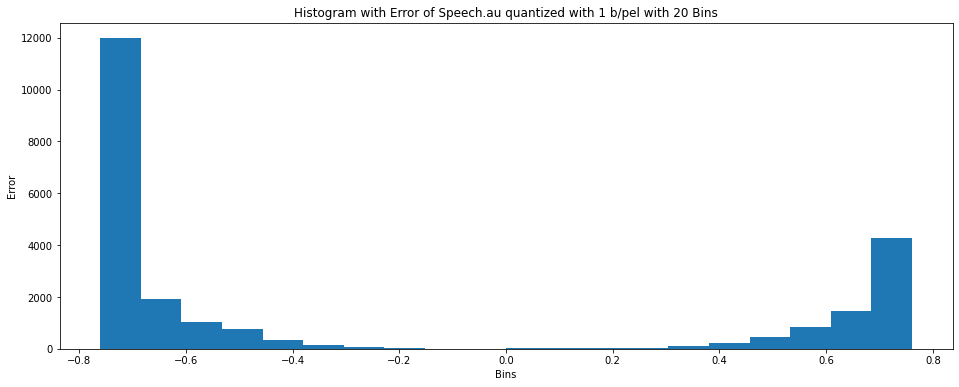

In [ ]:
plt.title("Histogram with Error of Speech.au quantized with 1 b/pel with 20 Bins")
plt.ylabel("Error")
plt.xlabel("Bins")
plt.hist(e1, bins=20)

**3. How does the number of quantization levels seem to affect the shape of the distribution?**

As quantization levels decrease, the error starts to space away from the zero and towards the limit of the bins.

**4. Explain why the error histograms you obtain might not be uniform?**

The size of bits that were chosen to quantized the signal.

**5. Compute and plot an estimate of the autocorrelation function for each of the four error signals using the following commands:**
```python
lags, r = xcorr(E, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

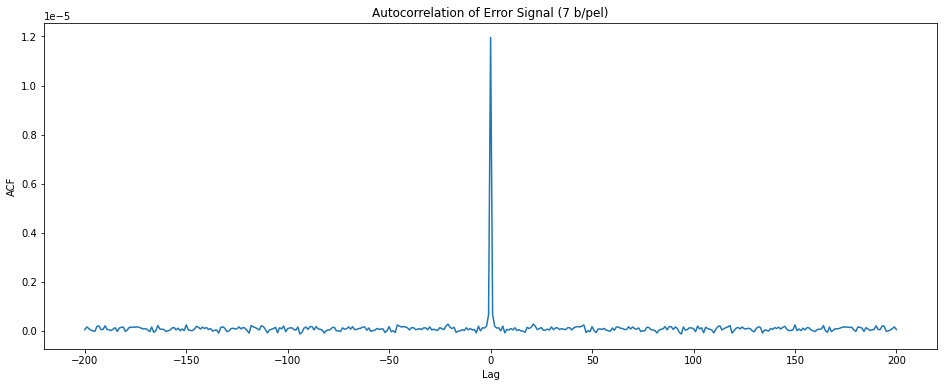

In [ ]:
# insert your code here
lags, r = xcorr(e7, e7, maxlags=200)
plt.title("Autocorrelation of Error Signal (7 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()
# better looks more like dirac delta, worse looks ulgier (convolution)

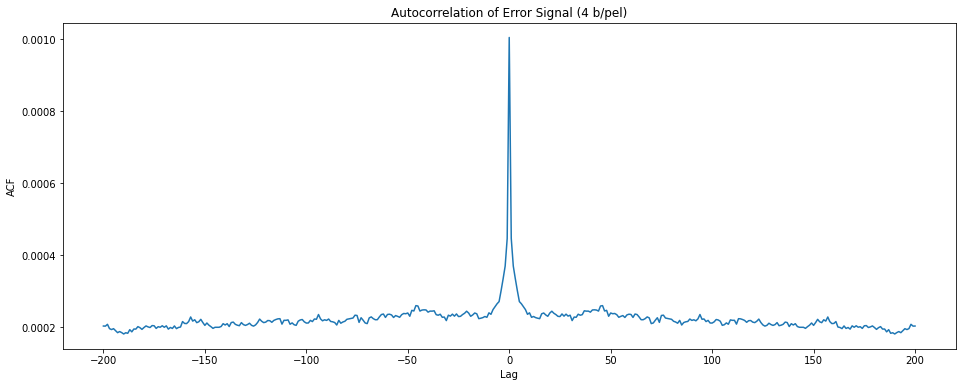

In [ ]:
# insert your code here
lags, r = xcorr(e4, e4, maxlags=200)
plt.title("Autocorrelation of Error Signal (4 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

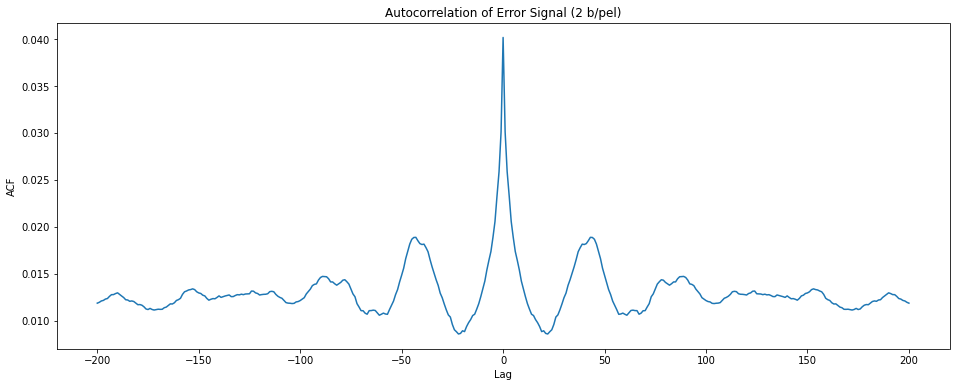

In [ ]:
# insert your code here
lags, r = xcorr(e2, e2, maxlags=200)
plt.title("Autocorrelation of Error Signal (2 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

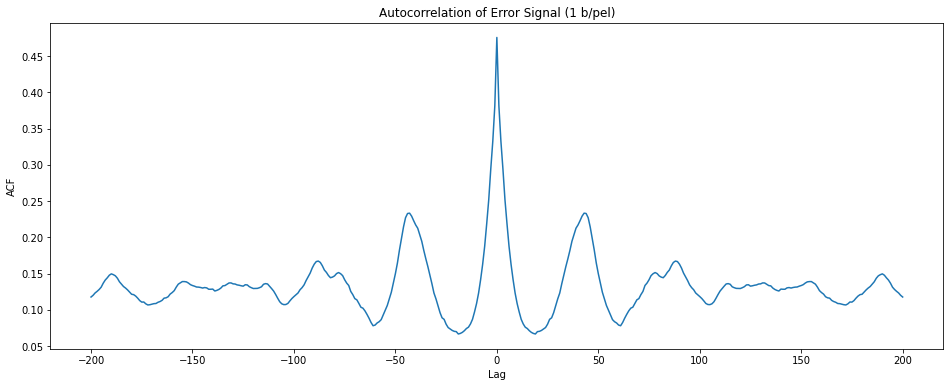

In [ ]:
# insert your code here
lags, r = xcorr(e1, e1, maxlags=200)
plt.title("Autocorrelation of Error Signal (1 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

**6. Now compute and plot an estimate of the cross-correlation function between the quantized speech $Y$ and each error signal $E$ using**
```python
lags, r = xcorr(E, Y, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

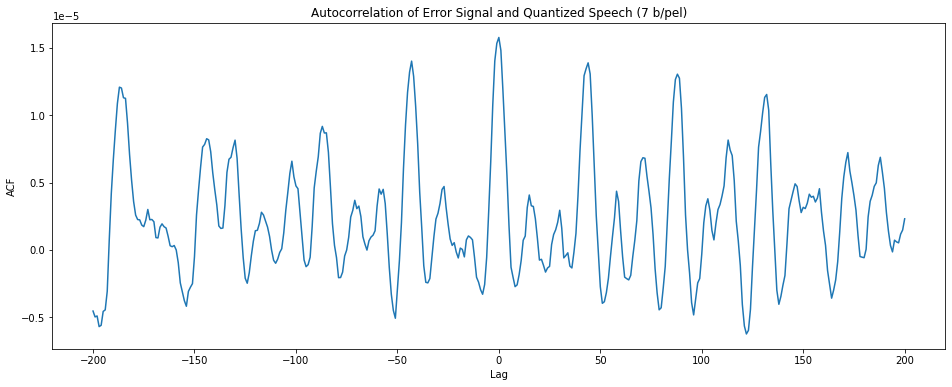

In [ ]:
# insert your code here
lags, r = xcorr(e7, speech, maxlags=200)
plt.title("Autocorrelation of Error Signal and Quantized Speech (7 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

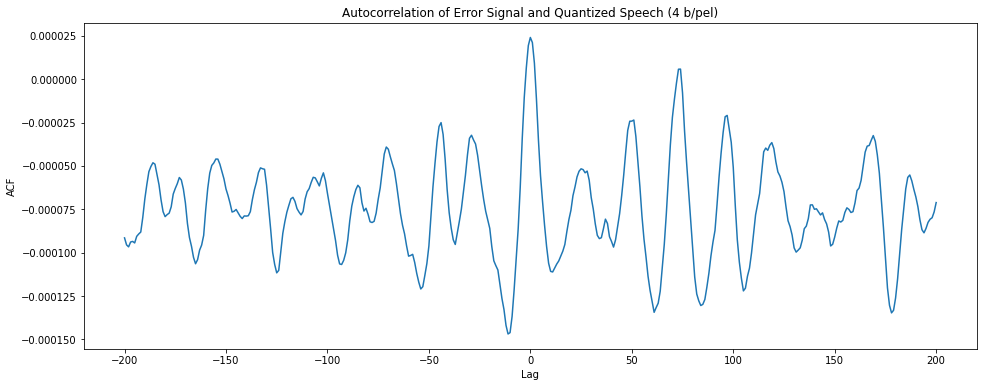

In [ ]:
lags, r = xcorr(e4, speech, maxlags=200)
plt.title("Autocorrelation of Error Signal and Quantized Speech (4 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

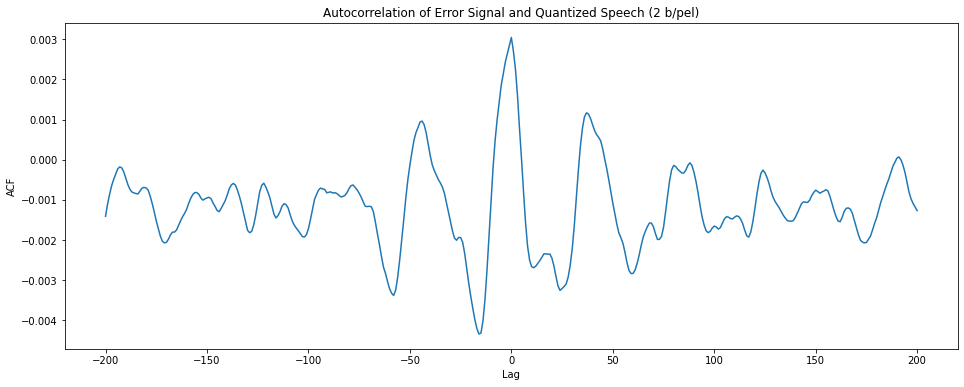

In [ ]:
lags, r = xcorr(e2, speech, maxlags=200)
plt.title("Autocorrelation of Error Signal and Quantized Speech (2 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

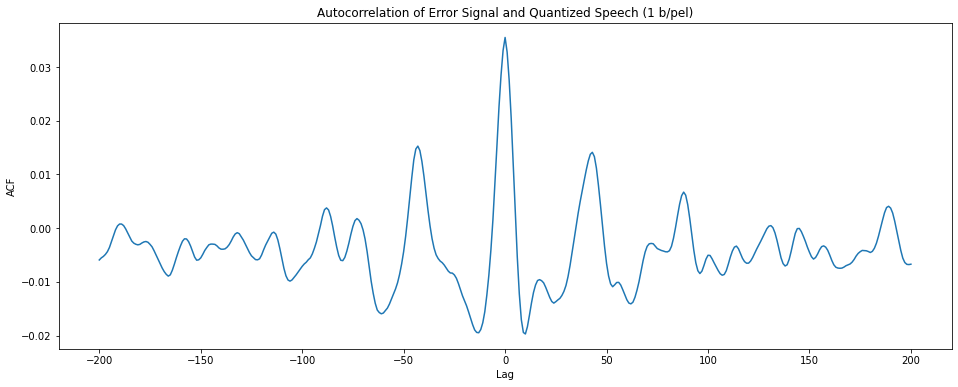

In [ ]:
lags, r = xcorr(e1, speech, maxlags=200)
plt.title("Autocorrelation of Error Signal and Quantized Speech (1 b/pel)")
plt.ylabel("ACF")
plt.xlabel("Lag")
plt.plot(lags, r)
plt.show()

**7. Is the autocorrelation influenced by the number of quantization levels? Do samples in the error signal appear to be correlated with each other?**

As the b/pel becomes samller, the peak of the autocorrelations gets larger and the ripples of the sides become larger. The samples in the error signal appear to be correlated with each other because in every sample, there is a peak at zero.

**8. Does the number of quantization levels influence the cross-correlation?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.6: Signal to Noise Ratio</left></h3>

**1. Complete the function below that calculates the power of a sampled signal `x`.**

In [ ]:
def get_power(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    P: the power of the signal
    """
    
    P = ( 1 / len(x) ) * np.sum(x**2)
    return P

**2. Compute the PSNR for the four quantized speech signals from the previous section.**

In [ ]:
# insert your code here
psnr7 = get_power(speech) / get_power(e7)

In [ ]:
psnr4 = get_power(speech) / get_power(e4)

In [ ]:
psnr2 = get_power(speech) / get_power(e2)

In [ ]:
psnr1 = get_power(speech) / get_power(e1)

**3. Assuming that the speech is sampled at $8$kHz, plot the rate distortion curve using $\frac{1}{\text{PSNR}}$ as the measure of distortion. Generate this curve by computing the PSNR for $7, 6, 5,\dots, 1$ bits/sample. Make sure the axes of the graph are in terms of *distortion* and *bit rate*.**

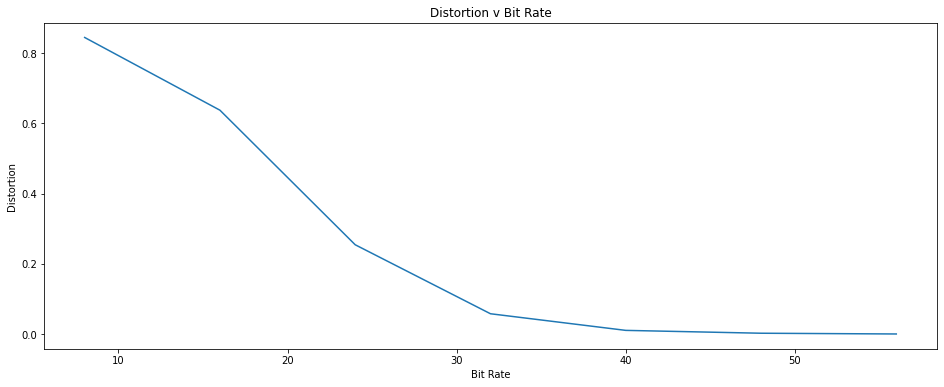

In [ ]:
# insert your code here
qs7 = Uquant(speech, 7)
qs6 = Uquant(speech, 6)
qs5 = Uquant(speech, 5)
qs4 = Uquant(speech, 4)
qs3 = Uquant(speech, 3)
qs2 = Uquant(speech, 2)
qs1 = Uquant(speech, 1)

e7 = qs7 - speech 
e6 = qs6 - speech 
e5 = qs5 - speech 
e4 = qs4 - speech
e3 = qs3 - speech 
e2 = qs2 - speech
e1 = qs1 - speech

psnr7 = get_power(qs7) / get_power(e7)
psnr6 = get_power(qs6) / get_power(e6)
psnr5 = get_power(qs5) / get_power(e5)
psnr4 = get_power(qs4) / get_power(e4)
psnr3 = get_power(qs3) / get_power(e3)
psnr2 = get_power(qs2) / get_power(e2)
psnr1 = get_power(qs1) / get_power(e1)
distort = [1/psnr1, 1/psnr2, 1/psnr3, 1/psnr4, 1/psnr5, 1/psnr6, 1/psnr7]

plt.title("Distortion v Bit Rate")
plt.ylabel("Distortion")
plt.xlabel("Bit Rate")
plt.plot(np.arange(1, 8, 1) * 8, distort)


<h3 style="color:red;"><left>Exercise 3.8</left></h3>

**1. First plot a $40$-bin histogram of this speech signal using ```plt.hist(speech, bins=40)```, and make an initial guess of the four optimal quantization levels. Print out the histogram and the initial guess of the quantization levels.**

(array([5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.500e+01, 1.800e+01,
        2.500e+01, 4.400e+01, 6.700e+01, 7.000e+01, 1.600e+02, 1.770e+02,
        3.100e+02, 4.420e+02, 4.500e+02, 5.920e+02, 8.130e+02, 1.175e+03,
        2.126e+03, 9.778e+03, 2.935e+03, 1.329e+03, 7.990e+02, 6.550e+02,
        4.740e+02, 3.670e+02, 2.380e+02, 2.360e+02, 1.010e+02, 1.250e+02,
        4.900e+01, 5.600e+01, 2.000e+01, 2.400e+01, 6.000e+00, 2.400e+01,
        1.300e+01, 5.000e+00, 1.400e+01, 1.600e+01]),
 array([-0.73034668, -0.69226685, -0.65418701, -0.61610718, -0.57802734,
        -0.53994751, -0.50186768, -0.46378784, -0.42570801, -0.38762817,
        -0.34954834, -0.31146851, -0.27338867, -0.23530884, -0.197229  ,
        -0.15914917, -0.12106934, -0.0829895 , -0.04490967, -0.00682983,
         0.03125   ,  0.06932983,  0.10740967,  0.1454895 ,  0.18356934,
         0.22164917,  0.259729  ,  0.29780884,  0.33588867,  0.37396851,
         0.41204834,  0.45012817,  0.48820801,  0.52628784,  0.5

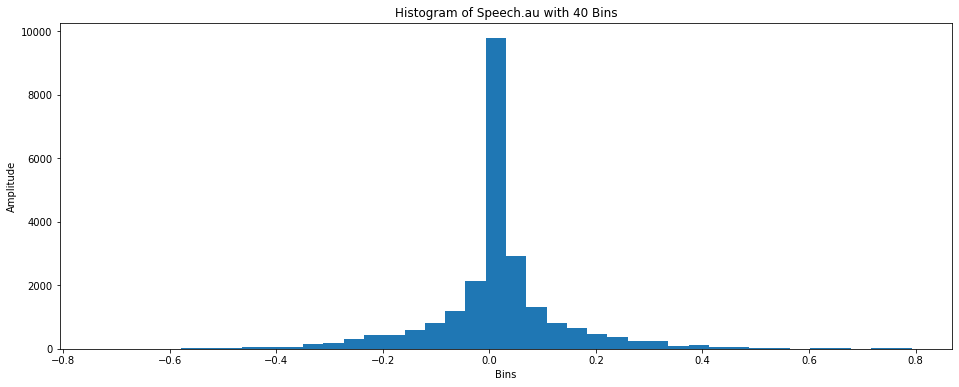

In [ ]:
# insert your code here
plt.title("Histogram of Speech.au with 40 Bins")
plt.ylabel("Amplitude")
plt.xlabel("Bins")
plt.hist(speech, bins=40)

In [ ]:
counts, bins = np.histogram(speech, bins = 40)
bin_intv = (np.abs(bins[0]) + np.abs(bins[40])) / 3
guess_opt_levels = [bins[0] + .5 * bin_intv, bins[0] + 1.5 * bin_intv, bins[0] + 2.5 * bin_intv, bins[0] + 3.5 * bin_intv]
print(guess_opt_levels)

[-0.4764811197916667, 0.03125, 0.5389811197916665, 1.0467122395833333]


**2. Use the function ```lloyds()``` to compute an optimal $4$-level codebook using `speech.au` as the training set.**

In [ ]:
# insert your code here
partition, codebook = lloyds(speech, guess_opt_levels)

**3. Once the optimal codebook is obtained, use the `codebook` and `partition` vectors to quantize the speech signal.**

* This may be done with a *for* loop and *if* statements.

In [ ]:
indx, quantv, distor = quantiz(speech, partition, codebook)

**4. Compute the error signal and PSNR.**

In [ ]:
# insert your code here
error = quantv - speech
psnr = get_power(quantv) / get_power(error)


**5. Plot the histogram in Q1 again. However, on this histogram plot, also mark where the optimal quantization levels fall along the $x$-axis.**

* To draw a vertical line, use `plt.axvline(x=0.8, color='r')` to plot a vertical line $x=0.8$ of red color.

(array([5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.500e+01, 1.800e+01,
        2.500e+01, 4.400e+01, 6.700e+01, 7.000e+01, 1.600e+02, 1.770e+02,
        3.100e+02, 4.420e+02, 4.500e+02, 5.920e+02, 8.130e+02, 1.175e+03,
        2.126e+03, 9.778e+03, 2.935e+03, 1.329e+03, 7.990e+02, 6.550e+02,
        4.740e+02, 3.670e+02, 2.380e+02, 2.360e+02, 1.010e+02, 1.250e+02,
        4.900e+01, 5.600e+01, 2.000e+01, 2.400e+01, 6.000e+00, 2.400e+01,
        1.300e+01, 5.000e+00, 1.400e+01, 1.600e+01]),
 array([-0.73034668, -0.69226685, -0.65418701, -0.61610718, -0.57802734,
        -0.53994751, -0.50186768, -0.46378784, -0.42570801, -0.38762817,
        -0.34954834, -0.31146851, -0.27338867, -0.23530884, -0.197229  ,
        -0.15914917, -0.12106934, -0.0829895 , -0.04490967, -0.00682983,
         0.03125   ,  0.06932983,  0.10740967,  0.1454895 ,  0.18356934,
         0.22164917,  0.259729  ,  0.29780884,  0.33588867,  0.37396851,
         0.41204834,  0.45012817,  0.48820801,  0.52628784,  0.5

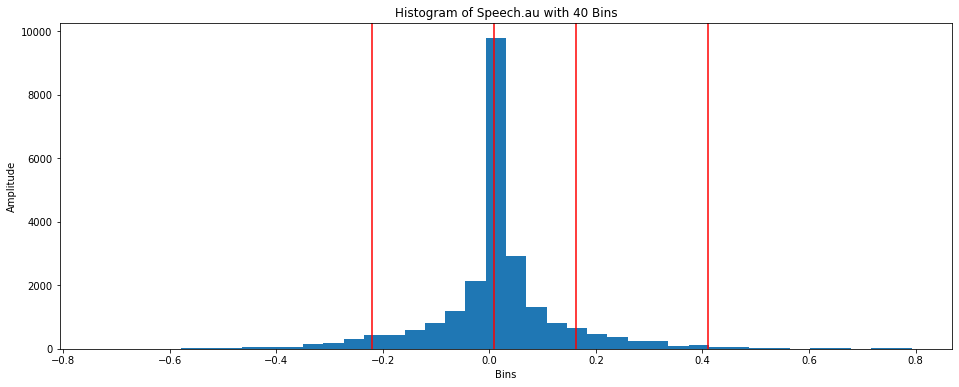

In [ ]:
# insert your code here
# insert your code here
plt.title("Histogram of Speech.au with 40 Bins")
plt.ylabel("Amplitude")
plt.xlabel("Bins")
plt.axvline(x=codebook[0], color='r')
plt.axvline(x=codebook[1], color='r')
plt.axvline(x=codebook[2], color='r')
plt.axvline(x=codebook[3], color='r')
plt.hist(speech, bins=40)

**6. Play the quantized audio, and compare the sound quality of the uniform- and max-quantized signals.**

In [ ]:
# insert your code here
speech, fs = sf.read("speech.au")
ipd.Audio(speech, rate=fs)

In [ ]:
ipd.Audio(quantv, rate=fs)

Compare here!

**7. If the speech signal was uniformly distributed, would the two quantizers be the same? Explain your answer.**

insert your answer here